In [ ]:
import matplotlib.pylab as plt
from skimage.morphology import skeletonize
import numpy as np 
import cv2

In [ ]:
img_name = 'Maze.jpg'
rgb_img = plt.imread(img_name)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(7, 7)) 
plt.imshow(gray_img)  
h=rgb_img.shape[0]
w=rgb_img.shape[1]
print(h)
print(w)

Do not forget to upload the image file to this colab every time you run this colab.

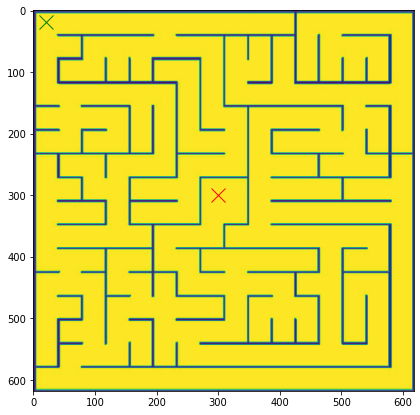

In [ ]:
x0, y0 = 20, 18
x1, y1 = 300, 300 
plt.figure(figsize=(7,7))
plt.imshow(gray_img)
plt.plot(x0, y0, 'gx', markersize=14)
plt.plot(x1, y1, 'rx', markersize=14)  

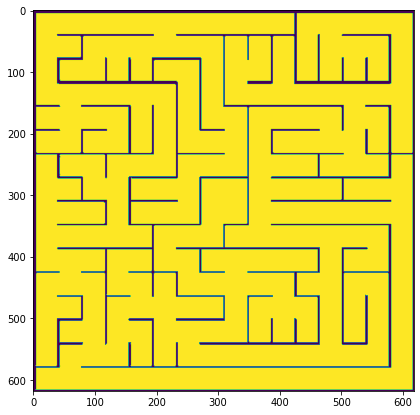

In [ ]:
th, thr_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(7,7))
plt.imshow(thr_img)
plt.show()

(618, 618)
True

300 300
<class 'numpy.ndarray'>


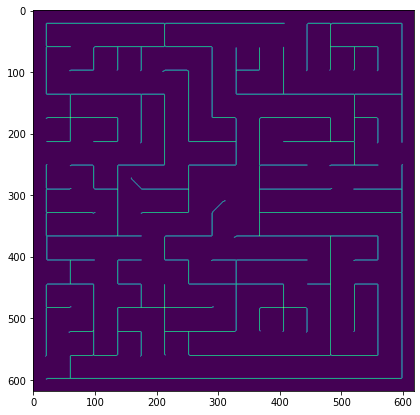

In [ ]:
skeleton = skeletonize(thr_img/255)
print(skeleton.shape)
print(skeleton[21,22])
#y1,x1=np.where(skeleton==True)
print()
print(y1,x1)

print(type(skeleton))
plt.figure(figsize=(7,7))
plt.imshow(skeleton)

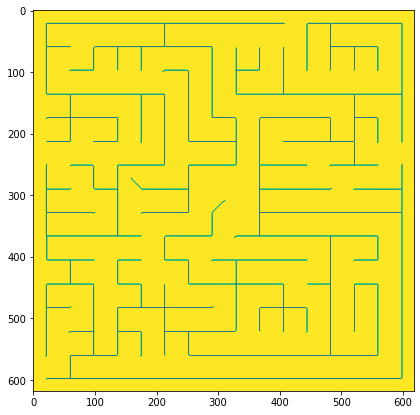

In [ ]:
mapT = ~skeleton
plt.figure(figsize=(7,7))
plt.imshow(mapT)
plt.show()

In [ ]:
_mapt = np.copy(mapT)
print(_mapt)
boxr = 30

if y1 < boxr: y1 = boxr
if x1 < boxr: x1 = boxr

cpys, cpxs = np.where(_mapt[y1 - boxr:y1 + boxr, x1 - boxr:x1 + boxr] == 0)
print(cpys, cpxs)

cpys += (y1 - boxr)
cpxs += (x1 - boxr)

idx = np.argmin(np.sqrt((cpys - y1) ** 2 + (cpxs - x1) ** 2))
y, x = cpys[idx], cpxs[idx]

pts_x = [x]
pts_y = [y]
pts_c = [0]

xmesh, ymesh = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2))
ymesh = ymesh.reshape(-1)
xmesh = xmesh.reshape(-1)

dst = np.zeros((thr_img.shape))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[39 39 40 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59] [40 41 38 39 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 21 20]


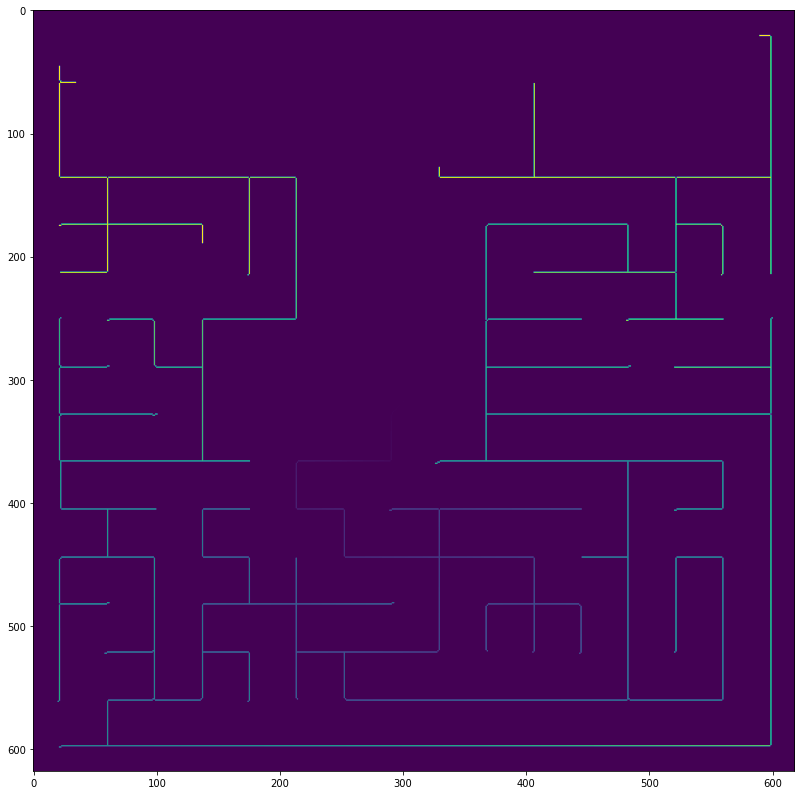

In [ ]:
# Breath first algorithm exploring a tree
while (True):
    idc = np.argmin(pts_c)
    ct = pts_c.pop(idc)
    x = pts_x.pop(idc)
    y = pts_y.pop(idc)
    
    ys, xs = np.where(_mapt[y - 1:y + 2, x - 1:x + 2] == 0)

    _mapt[ys + y - 1, xs + x - 1] = ct
    _mapt[y, x] = 9999999

    dst[ys + y - 1, xs + x - 1] = ct + 1

    pts_x.extend(xs + x - 1)
    pts_y.extend(ys + y - 1)
    pts_c.extend([ct + 1] * xs.shape[0])

    if pts_x == []:
        break
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < boxr:
        edx = x
        edy = y
        break
        
plt.figure(figsize=(14, 14))
plt.imshow(dst)
plt.show()

path_x = []
path_y = []

y = edy
x = edx

In [ ]:
while (True):
    nbh = dst[y - 1:y + 2, x - 1:x + 2]
    nbh[1, 1] = 9999999
    nbh[nbh == 0] = 9999999

    if np.min(nbh) == 9999999:
        break

    idx = np.argmin(nbh)
    
    y += ymesh[idx]
    x += xmesh[idx]

    if np.sqrt((x - x1) ** 2 + (y - y1) ** 2) < boxr:
        print('Optimum route found.')
        break
    path_y.append(y)
    path_x.append(x)


Optimum route found.


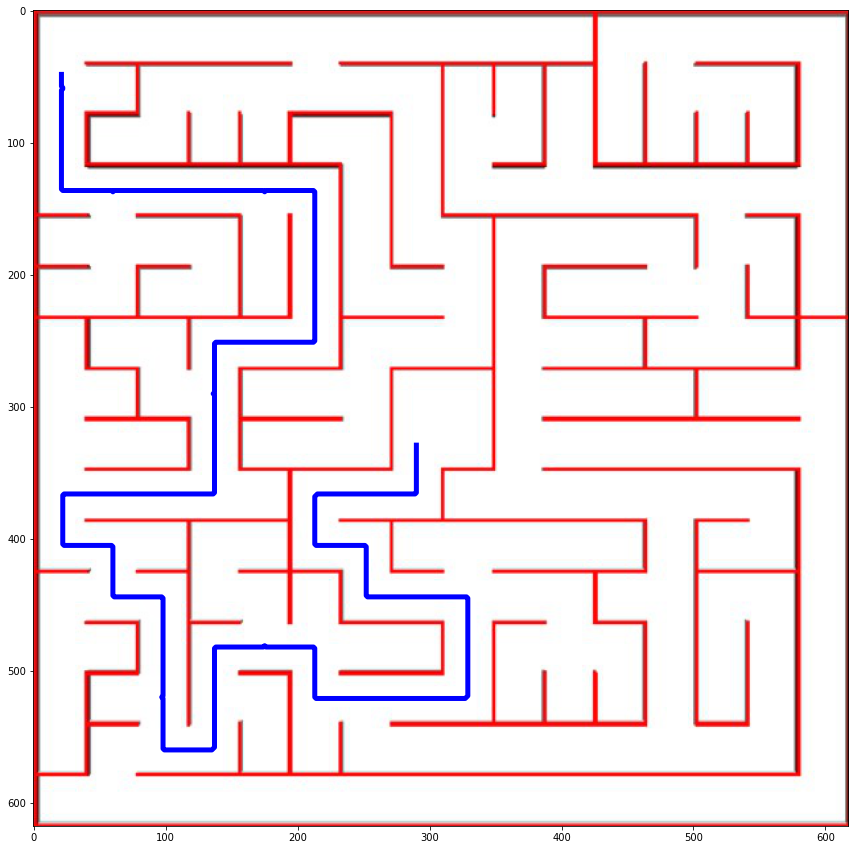

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(rgb_img)
plt.plot(path_x, path_y, 'b-', linewidth=5)
plt.show()

In [ ]:
n=len(path_x)
path=[]
for i in range(n):
  path.append([path_x[i],path_y[i]])

print(path)
#path contains the list of all the [x,y] coordinates of the shortest path

[[21, 48], [21, 49], [21, 50], [21, 51], [21, 52], [21, 53], [21, 54], [21, 55], [21, 56], [21, 57], [22, 58], [22, 59], [21, 60], [21, 61], [21, 62], [21, 63], [21, 64], [21, 65], [21, 66], [21, 67], [21, 68], [21, 69], [21, 70], [21, 71], [21, 72], [21, 73], [21, 74], [21, 75], [21, 76], [21, 77], [21, 78], [21, 79], [21, 80], [21, 81], [21, 82], [21, 83], [21, 84], [21, 85], [21, 86], [21, 87], [21, 88], [21, 89], [21, 90], [21, 91], [21, 92], [21, 93], [21, 94], [21, 95], [21, 96], [21, 97], [21, 98], [21, 99], [21, 100], [21, 101], [21, 102], [21, 103], [21, 104], [21, 105], [21, 106], [21, 107], [21, 108], [21, 109], [21, 110], [21, 111], [21, 112], [21, 113], [21, 114], [21, 115], [21, 116], [21, 117], [21, 118], [21, 119], [21, 120], [21, 121], [21, 122], [21, 123], [21, 124], [21, 125], [21, 126], [21, 127], [21, 128], [21, 129], [21, 130], [21, 131], [21, 132], [21, 133], [21, 134], [21, 135], [22, 136], [23, 136], [24, 136], [25, 136], [26, 136], [27, 136], [28, 136], [29, 1

In [ ]:
SPC=np.array(path)
np.save('shortest_path_c.npy',SPC)

In [ ]:
model = np.load('/content/shortest_path_c.npy')
model.shape

(1680, 2)